<a href="https://colab.research.google.com/github/0m0kenny/0m0kenny/blob/main/Neurob_Prog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Prognosis of Neuroblastoma Patients via RNA sequencing Data

## Abstract
                
RNA-Seq reveals an unprecedented complexity of the neuroblastoma transcriptome and is suitable for clinical endpoint prediction [ microarray ]

### Experiment Description  

We generated gene expression profiles from 498 primary neuroblastomas using RNA-Seq and microarrays. We sought to systematically evaluate the capability of RNA deep-sequencing (RNA-Seq)-based classification for clinical endpoint prediction in comparison to microarray-based ones. The neuroblastoma cohort was randomly divided into training and validation sets (**Please note:** <em>in the following we refer to this validation set as test set</em>), and 360 predictive models on six clinical endpoints were generated and evaluated. While prediction performances did not differ considerably between the two technical platforms, the RNA-Seq data processing pipelines, or feature levels (i.e., gene, transcript, and exon junction levels), RNA-Seq models based on the AceView database performed best on most endpoints. Collectively, our study reveals an unprecedented complexity of the neuroblastoma transcriptome, and provides guidelines for the development of gene expression-based predictive classifiers using high-throughput technologies.  Sample clinical characteristics definitions:  

* sex:
    <ul>
    <li>M = male</li>
    <li>F = female</li>
    </ul>
    
* age at diagnosis: The age in days at diagnosis
    <ul>
    <li>integer</li>
    </ul>

* high risk: Clinically considered as high-risk neuroblastoma
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>


* INSS stage: Disease stage according to International Neuroblastoma Staging System ([INSS](https://www.cancer.org/cancer/neuroblastoma/detection-diagnosis-staging/staging.html))
    <ul>
    <li>1</li>
    <li>2</li>
    <li>3</li>
    <li>4</li>
    <li>4S</li>
    </ul>


* progression: Occurrence of a tumor progression event
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>



* death from disease: Occurrence of death from the disease (yes=1; no=0)
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>





Gene expression of 498 neuroblastoma samples was quantified by RNA sequencing as well as by microarray analyses in order to understand the neuroblastoma transcriptome and predict clinical endpoints.


## Task

The task is to predict the missing values in the validation set (from here on called test set) using the RNAseq Data.

# Import necessary packages

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plotting and visulisation
import seaborn as sns # nicer (easier) visualisation
%matplotlib inline
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.preprocessing import StandardScaler


# for saving
import os,os.path

# Set up directory and filenames

In [ ]:
data_dir = '..{}data'.format(os.path.sep)
#load in files
fn_fpkm             = '/content/drive/MyDrive/Colab Notebooks/DataSet2/log2FPKM.tsv'
fn_patient_info     = '/content/drive/MyDrive/Colab Notebooks/DataSet2/patientInfo.tsv'
fn_prop_intensities = '/content/drive/MyDrive/Colab Notebooks/DataSet2/allProbIntensities.tsv'




# Load the RNAs-Seq data

This part already sets the indeces in the DataFrame. Please feel free to change as required.

In [29]:
df_fpkm = pd.read_csv('{}'.format(fn_fpkm),sep='\t',).rename({'00gene_id':'gene_id'},axis=1)
#set row/column headers
df_fpkm = df_fpkm.set_index(['gene_id'])
df_fpkm.columns.name = 'ID'

#view the data
df_fpkm.head()


ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


### Load the patient factors, including the potential endpoints

This part already sets the indeces in the DataFrame. Please feel free to change as required.
Please note, that the ```FactorValues``` should have a 1-to-1 correspondence to the factors described in the abstract.

In [30]:
df_patient_info = pd.read_csv('{}'.format(fn_patient_info),sep='\t').set_index('ID')
df_patient_info.columns.name = 'FactorValues'

df_patient_info.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB497,female,379,0.0,0.0,1,0.0
NB496,male,132,NaN,NaN,NaN,NaN
NB495,male,163,0.0,0.0,1,0.0
NB494,male,56,NaN,NaN,NaN,NaN


## Explore Datasets

### Patient Info

In [33]:
df_patient_info.describe(include='all')

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
count,498,498.000000,249.000000,249.000000,249,249.000000
unique,2,NaN,NaN,NaN,5,NaN
top,male,NaN,NaN,NaN,4,NaN
freq,287,NaN,NaN,NaN,91,NaN
mean,NaN,758.562249,0.204819,0.345382,NaN,0.357430
std,NaN,1031.049929,0.404382,0.476450,NaN,0.480208
min,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,165.250000,0.000000,0.000000,NaN,0.000000
50%,NaN,444.500000,0.000000,0.000000,NaN,0.000000
75%,NaN,1008.500000,0.000000,1.000000,NaN,1.000000




*   All FactorValues columns are 0/1 except age and sex
*   Age is continuous so might require scaling
*   Sex and inss.stage are categorical so require encoding



#### Age

/tmp/ipython-input-34-3252365733.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age);


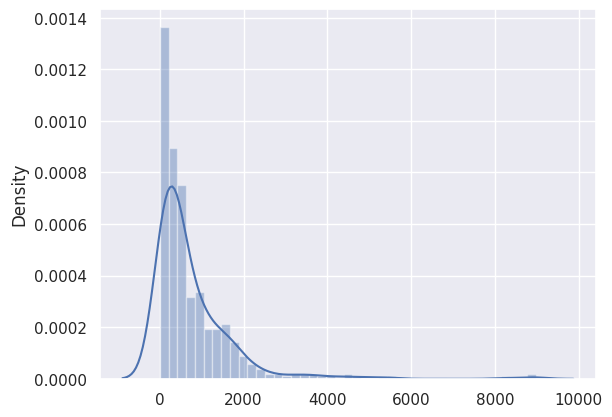

In [34]:
age = df_patient_info[['FactorValue..age.at.diagnosis.']]

sns.set(color_codes = True);

sns.distplot(age);

The min age is at zero which suggests at babies are also included.

In [51]:
print(df_patient_info["FactorValue..inss.stage."].value_counts(), '\n')
print(df_patient_info["FactorValue..high.risk."].value_counts(),'\n')
print(df_patient_info["FactorValue..progression."].value_counts(),'\n')
print(df_patient_info["FactorValue..death.from.disease."].value_counts(),'\n')

FactorValue..inss.stage.
4     91
1     60
2     40
3     30
4S    28
Name: count, dtype: int64 

FactorValue..high.risk.
0.0    163
1.0     86
Name: count, dtype: int64 

FactorValue..progression.
0.0    160
1.0     89
Name: count, dtype: int64 

FactorValue..death.from.disease.
0.0    198
1.0     51
Name: count, dtype: int64 



Class imbalance seen with all four classes. Will focus on balancing the inss.stage with SMOTE in this notebook..

### FPKM

In [ ]:
df_fpkm

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.862512,0.051655,0.022912,0.108028,0.049621,0.264942,0.044684,0.000000,0.012183,0.021898,...,0.026980,0.094324,0.780477,0.043928,0.025368,0.011083,0.000000,0.070668,0.022501,0.031067
ZYG11B,3.561729,3.595790,2.236695,3.312516,2.235632,3.459969,3.130989,2.359791,2.361504,3.284610,...,2.827654,2.569946,3.569224,2.773570,3.690249,3.274257,3.380637,3.420162,3.462327,3.440527
ZYX,5.039327,5.144157,4.982975,6.142091,5.236531,6.108395,5.645258,5.018567,5.393207,5.730512,...,5.103993,4.754433,4.938587,4.572914,4.877509,5.591545,5.207842,5.346003,5.427338,5.148169


There are 23146 genes and 498 samples

In [ ]:
df_fpkm.describe(include='all')

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
count,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,...,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000
mean,2.131786,2.031470,1.982196,2.099646,2.003848,2.011317,2.096597,1.920999,2.065478,1.986630,...,1.920203,2.024646,2.047632,1.992819,2.002479,2.054730,2.064404,2.016765,2.051336,2.104204
std,1.951392,1.971386,1.968145,1.993527,1.943513,1.975446,1.937307,1.968883,2.017544,2.016251,...,1.926518,2.047764,2.006113,1.926888,1.966683,1.978456,1.960457,1.964566,1.927895,1.927567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117889,0.083477,0.055345,0.087390,0.078837,0.055772,0.116028,0.043383,0.086224,0.051249,...,0.050910,0.047880,0.071446,0.083381,0.053790,0.079285,0.084918,0.076877,0.095710,0.129845
50%,1.978968,1.682904,1.611080,1.846068,1.717048,1.670781,1.917371,1.472477,1.699238,1.511961,...,1.544990,1.647250,1.712686,1.721878,1.634305,1.767362,1.813757,1.681775,1.840993,1.938244
75%,3.582427,3.516214,3.414691,3.587926,3.389331,3.498391,3.513794,3.357375,3.542357,3.475403,...,3.305106,3.446130,3.480860,3.378446,3.487406,3.482403,3.508283,3.447391,3.452575,3.516920
max,13.201288,12.664172,13.915674,11.866379,13.486936,12.584354,11.005814,15.514942,13.823188,14.112179,...,12.374550,13.633097,11.191732,14.084759,13.527550,15.841282,15.281579,15.791583,15.669098,11.221629


/tmp/ipython-input-26-1642575340.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fpkm.T);


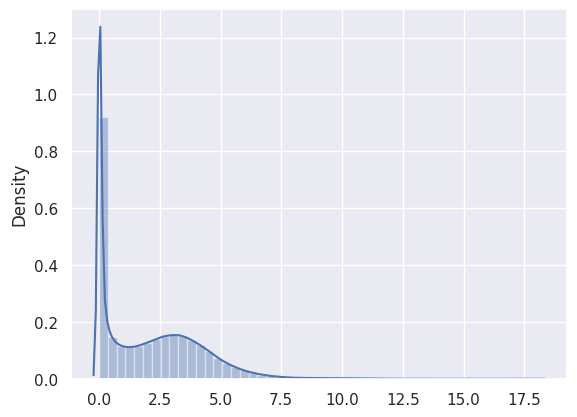

In [26]:
#plot distribution of the gene expression
sns.set(color_codes = True);

sns.distplot(df_fpkm.T);

The data has high peak at 0 suggesting lots of gene expression values close to 0 . Will consider further processing to remove some zeros, transform the data by scaling and then imputing some values.

## Preprocess and split datasets


Some of the factor values for some of the patient **ID**s are NaN.
Every row, where this information is missing indicate a real validation entry. We can use this information and create two separate DataFrames, one for training, one for the validation (testing).

In [ ]:
def preprocess(df_data, df_metadata, count_threshold=0.1, threshold_percentage=0.8, use_scaler=False, scale_age=False):

    """
    Function to filter genes with low expression count below a set threshold, remove missing values, scale and join with metadata.
    The function also label-encodes the sex and inss stage factor values and scales the age in the metadata.
    Then splits the data into training and testing sets.

    PARAMETERS:
        df_data (pd.DataFrame): GENE EXPRESSION DATA
        df_metadata (pd.DataFrame): PATIENT INFORMATION METADATA
        count_threshold (float): THRESHOLD FOR LOW VALUE FILTERING; DEFAULT = 0.1
        threshold_percentage (float): PERCENTAGE THRESHOLD FOR FILTERING ROWS WITH LOW VALUE; DEFAULT = 0.8
        use_scaler (bool): OPTIONAL; SCALE EXPRESSION DATA using StandardScaler; DEFAULT = False
        scale_age (bool): OPTIONAL; SCALE 'FactorValue..age.at.diagnosis.' COLUMN IN METADATA; DEFAULT = False
    """

    ## EXPRESSION DATA PROCESSING
    # CALCULATE ROW (GENE EXPRESSION) FILTER THRESHOLD
    threshold = int(df_data.shape[1] * threshold_percentage)
    low_counts = (df_data <= count_threshold).sum(axis=1)

    # FILTER ROWS WITH TOO MANY LOW COUNTS
    processed_data = df_data[low_counts < threshold]

    # REMOVE ROWS WHERE INDEX / ROWNAMES HAS NaN / MISSING VALUES
    if processed_data.index.isna().any():
        processed_data = processed_data[~processed_data.index.isna()]

    # ENSURE COLUMN NAMES (PATIENT ID) ARE LIMITED TO FIRST 5 CHARACTERS
    processed_data.columns = [col[:5] for col in processed_data.columns]

    # OPTIONAL; SCALE THE EXPRESSION DATA
    if use_scaler:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(processed_data)
        processed_data = pd.DataFrame(scaled_data, index=processed_data.index, columns=processed_data.columns)

    # TRANSPOSE THE DATA IF REQUIRED
    if processed_data.shape[0] != df_metadata.shape[0]:
        processed_data = processed_data.T
        processed_data.index.name = 'ID'


    ## PATIENT METADATA PROCESSING
    # OPTIONAL; SCALE 'FactorValue..age.at.diagnosis.'
    if scale_age and 'FactorValue..age.at.diagnosis.' in df_metadata.columns:
        scaler = StandardScaler()
        df_metadata['FactorValue..age.at.diagnosis.'] = scaler.fit_transform(df_metadata[['FactorValue..age.at.diagnosis.']])

    # ENCODE 'FactorValue..Sex.' AS NUMERIC (FEMALE = 0, MALE = 1)
    if 'FactorValue..Sex.' in df_metadata.columns:
        le = LabelEncoder()
        df_metadata['FactorValue..Sex.']=le.fit_transform(df_metadata['FactorValue..Sex.'])

    # Encode 'FactorValue..inss.stage.' AS NUMERIC (1,2,3,4,4S = 0,1,2,3,4)
    if 'FactorValue..inss.stage.' in df_metadata.columns:
        le = LabelEncoder()
        df_metadata['FactorValue..inss.stage.'] = le.fit_transform(df_metadata['FactorValue..inss.stage.'])


    ## MERGE THEN SPLIT EXPRESSION DATA AND PATIENT METADATA INTO TRAINING AND TESTING DATAFRAMES
    # JOIN EXPRESSION DATA & METADATA
    df_combined = df_metadata.join(processed_data, how='inner')

    # SPLIT JOINED DATA INTO TRAIN AND TEST SETS
    train = df_combined[df_combined['FactorValue..death.from.disease.'].notna()]
    test = df_combined[df_combined['FactorValue..death.from.disease.'].isna()]

    return train, test



In [25]:
#perform preprocess
train, test = preprocess(df_fpkm, df_patient_info)
train

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.,1/2-SBSRNA4,A1BG,A1BG-AS1,A2LD1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ID,,,,,,,,,,,,,,,,,,,,,
NB497,0,379,0.0,0.0,0,0.0,0.660139,1.994978,1.529221,1.068072,...,2.866374,3.412777,1.539571,2.346282,3.048123,0.022501,3.462327,5.427338,3.107112,3.446606
NB495,1,163,0.0,0.0,0,0.0,0.868249,1.493852,1.208723,0.812093,...,3.183471,3.754813,1.118021,1.835253,3.257655,0.000000,3.380637,5.207842,3.231953,3.206993
NB493,1,190,0.0,0.0,0,0.0,0.805515,1.649027,0.925425,0.743496,...,3.555730,4.049648,0.997617,2.036475,2.826308,0.025368,3.690249,4.877509,2.951646,3.293082
NB491,1,2326,0.0,1.0,3,1.0,0.842437,1.205317,0.643751,0.837443,...,3.771463,5.895036,0.905195,1.547909,3.018102,0.780477,3.569224,4.938587,2.949716,2.957478
NB489,0,865,0.0,1.0,3,0.0,0.997977,2.336929,1.182908,0.673627,...,2.865755,4.356721,1.834614,2.925014,3.523813,0.026980,2.827654,5.103993,3.519328,2.563558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB009,0,217,0.0,1.0,4,0.0,0.981855,1.436439,0.771248,0.666877,...,3.581122,5.193176,1.196494,2.289598,3.409242,0.012183,2.361504,5.393207,2.730553,2.271136
NB007,1,942,0.0,1.0,3,1.0,1.811352,1.617745,1.304178,1.018705,...,3.475448,4.009473,1.407451,2.198063,3.123347,0.044684,3.130989,5.645258,2.755304,2.933508
NB005,0,536,1.0,1.0,3,1.0,0.905540,1.942946,1.365043,0.924853,...,3.582977,4.766362,1.038738,1.890104,2.823576,0.049621,2.235632,5.236531,2.761698,2.226502


### SMOTE

In [57]:
# Split features and the INSS target

X_train_inss = train.drop(columns=["FactorValue..inss.stage."])

y_train_inss = train["FactorValue..inss.stage."]



from imblearn.over_sampling import SMOTE



# Apply SMOTE for INSS stage

smote_inss = SMOTE(random_state=42)

X_train_inss_smote, y_train_inss_smote = smote_inss.fit_resample(X_train_inss, y_train_inss)



# Verify the new distribution

print("INSS Stage Distribution After Resampling:")

print(pd.Series(y_train_inss_smote).value_counts())



# Use the feature set from INSS resampling

resampled_features = pd.DataFrame(X_train_inss_smote, columns=X_train_inss.columns)



# Combine the resampled features and INSS target

resampled = pd.concat([

    resampled_features,

    pd.Series(y_train_inss_smote, name="FactorValue..inss.stage.")

], axis=1)



# Reorder to maintain the desired column order

columns = list(resampled.columns)  # Get the current column order

columns.insert(5, columns.pop(columns.index("FactorValue..inss.stage.")))  # Move "INSS stage" to 6th position

resampled = resampled[columns]

resampled
resampled.to_csv('resampled.csv')

INSS Stage Distribution After Resampling:
FactorValue..inss.stage.
0    91
3    91
2    91
1    91
4    91
Name: count, dtype: int64


In [59]:
#view the resampled
resampled.describe()

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..progression.,FactorValue..inss.stage.,1/2-SBSRNA4,A1BG,A1BG-AS1,A2LD1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.459341,559.200000,0.194085,0.244486,0.326214,2.00000,0.804979,1.859464,1.090249,0.852469,...,3.046922,3.657635,1.192760,2.033588,3.149575,0.094519,3.286677,5.369551,3.078077,3.168155
std,0.498893,748.411249,0.371958,0.415846,0.434008,1.41577,0.250926,0.661455,0.330273,0.253958,...,0.474003,0.900644,0.248136,0.294768,0.230258,0.208574,0.405475,0.423973,0.305810,0.319604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.162294,0.826085,0.270123,0.248241,...,1.708836,1.567219,0.496008,1.024199,2.323866,0.000000,1.604147,3.407402,1.891221,1.829480
25%,0.000000,103.500000,0.000000,0.000000,0.000000,1.00000,0.631855,1.573908,0.920383,0.691248,...,2.752739,3.008587,1.042837,1.853987,3.012315,0.013487,3.116822,5.146803,2.912957,3.000814
50%,0.000000,321.000000,0.000000,0.000000,0.000000,2.00000,0.795217,1.714402,1.068541,0.820782,...,3.064422,3.694223,1.182196,2.010816,3.153826,0.034839,3.360918,5.381102,3.086762,3.214377
75%,1.000000,697.500000,0.009801,0.320960,0.905043,3.00000,0.953238,1.996210,1.201269,0.974504,...,3.348520,4.345886,1.316850,2.218773,3.321235,0.077161,3.554815,5.605000,3.277372,3.358533
max,1.000000,8278.000000,1.000000,1.000000,1.000000,4.00000,2.065786,8.397936,3.624674,1.926379,...,4.562310,5.895036,2.575903,3.592672,3.865256,2.298635,4.501356,6.607462,3.889094,4.299135


In [60]:
binary_columns = ["FactorValue..progression.", "FactorValue..high.risk.", "FactorValue..death.from.disease."]
#convert any valdlue in the columns to 1 if >0.5 or to 0 otherwise.
resampled[binary_columns] = resampled[binary_columns].apply(lambda col: col.map(lambda x: 1.0 if x >= 0.5 else 0.0))

## Feature Selection
Feature selection performed using the Randomforest model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score

def extract_top_genes(train_FPKM, factor_values, n=1500):



    """

    Arguements:

    - train_FPKM (pd.DataFrame): combined dataframe of FPKM and patient info

    - factor_values (list): list of Factor Value column names to analyse

    - n (int): number of top genes to select for each Factor Value

    """



    all_genes = []

    gene_cols = [col for col in train_FPKM.columns if col not in factor_values]



    parameters = {

        'n_estimators': [10, 15],

        'max_depth': [4, 6],

        'min_samples_split': [2, 5],

        'min_samples_leaf': [2, 5]

    }



    for factor in factor_values:

        y = train_FPKM[factor]

        X = train_FPKM[gene_cols]



        # Train-test split

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)



        # Random Forest with Grid Search

        random_f_model = RandomForestClassifier(random_state=8)

        rf_grid_search = GridSearchCV(random_f_model, parameters, cv=5,
                                      scoring='balanced_accuracy', verbose=3)

        rf_grid_search.fit(X_train, y_train)



        # Best model

        best_model = rf_grid_search.best_estimator_

        y_test_predicted = best_model.predict(X_test)



        # Extract feature importance

        feature_importance = best_model.feature_importances_

        df_importance = pd.DataFrame(list(zip(X_train.columns, feature_importance)),

                                     columns=['gene', 'feature_importance'])

        df_importance = df_importance.set_index(['gene'])

        df_importance.sort_values(['feature_importance'], ascending=False, inplace=True)



        # Select top N genes

        top_genes = df_importance.head(n)

        all_genes.append(top_genes)



    # Combine all selected genes and remove duplicates

    combined_genes = pd.concat(all_genes)

    unique_genes = combined_genes.groupby(combined_genes.index).mean().sort_values(

        by='feature_importance', ascending=False

    )



    return unique_genes



factor_values = [

    'FactorValue..death.from.disease.',

    'FactorValue..high.risk.',

    'FactorValue..inss.stage.',

    'FactorValue..progression.'

]



unique_genes = extract_top_genes(resampled, factor_values)
#unique_genes = extract_top_genes(train, factor_values)

unique_genes = unique_genes.sort_values(by='feature_importance', ascending=False)

top_500 = unique_genes.head(100)



filtered_train = train[list(train.columns[0:6]) + list(top_500.index)]

filtered_test = test[list(test.columns[0:6]) + list(top_500.index)]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.777 total time=   0.4s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.4s
[CV 3/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.769 total time=   0.4s
[CV 4/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.611 total time=   0.4s
[CV 5/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.840 total time=   0.4s
[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=15;, score=0.777 total time=   0.5s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=15;, score=0.786 total time=   0.5s
[CV 3/5] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=15;, score=0.832 total time=   0.5s
[CV 4/5] EN

KeyboardInterrupt: 